# LDA Subspace

In [2]:
import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

def plot_2D_scatter(X_trans, y):
    fig, (ax) = plt.subplots(1, figsize=(5, 5), gridspec_kw={'hspace': 0.40})
    ax.scatter(X_trans[:, 0], X_trans[:, 1], c=y)
    plt.show()

# Numpy / Torch Mixture

In [3]:
X_1 = torch.normal(1, 0.4, size=(5,20))
y_1 = torch.zeros(5)
X_2 = torch.normal(1, 1.2, size=(5,20))
y_2 = torch.ones(5)

X = torch.cat((X_1, X_2))
y = torch.cat((y_1, y_2))

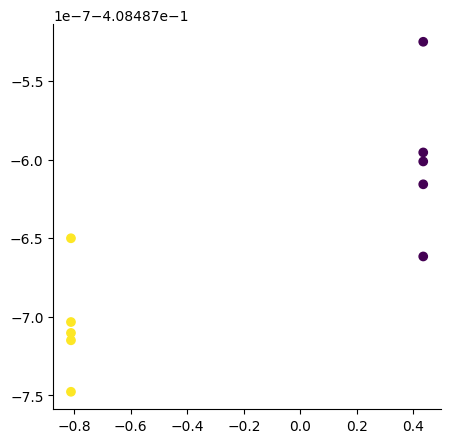

In [5]:
class LDA:

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]

            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)


        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        
        idxs = np.argsort(abs(eigenvalues))[::-1]
        self.eigenvals = eigenvalues[idxs]
        self.eigenvecs = eigenvectors[idxs]
        self.inverse_eigenvecs = np.linalg.inv(eigenvectors[idxs])

    
lda = LDA()
lda.fit(X.numpy(),y.numpy())
X_trans = X@ lda.eigenvecs.T

plot_2D_scatter(X_trans, y)

X_recovered = (X_trans@ lda.inverse_eigenvecs.T).real


In [7]:
np.round(X - X_recovered,6)

tensor([[-0., 0., 0., -0., 0., -0., -0., -0., -0., 0., -0., -0., -0., 0., -0., -0., -0., 0., 0., -0.],
        [-0., 0., 0., -0., 0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., 0., -0., 0., 0., -0.],
        [-0., 0., 0., -0., 0., -0., -0., -0., -0., 0., -0., -0., -0., 0., -0., 0., 0., 0., 0., -0.],
        [0., 0., 0., -0., 0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., 0., 0., 0., 0., -0.],
        [0., 0., 0., -0., 0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., 0., -0., 0., 0., -0.],
        [0., 0., 0., 0., 0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., 0., -0., 0., 0., 0.],
        [-0., 0., 0., -0., 0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., 0., -0., 0., 0., -0.],
        [0., 0., 0., -0., 0., -0., -0., -0., -0., 0., -0., -0., -0., 0., -0., 0., 0., 0., 0., -0.],
        [0., 0., -0., -0., 0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., 0., -0., 0., 0., -0.],
        [0., 0., 0., -0., 0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., 0., -